(np.float64(nan), np.float64(nan), np.float64(nan))
0.8250777095926143 (np.float64(9915.529926460684), np.float64(36901.97676265373), np.float64(87253.51023208021), np.float64(50825.88940701128))
xi = 1
a_gamma_sf = 0.02894579515842816
e_b = 0.1
b_sf = 0.5


/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23062/3207067267.py:109: RuntimeWarning: invalid value encountered in scalar power
  gamma_a0 = gamma_m * ((tq_gm * cq_1)**(1/(q+4))) #eq 21 to start not sure how to make it


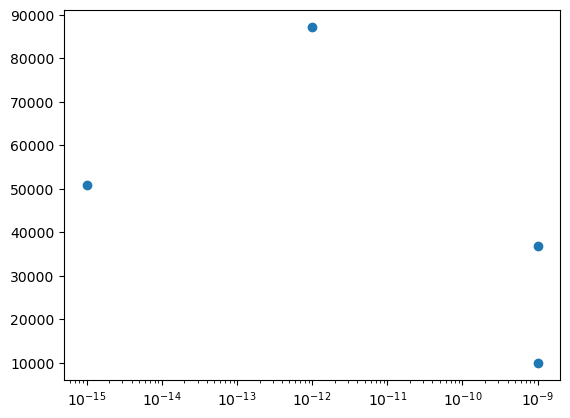

In [17]:
import numpy as np
import pandas as pd
import math
import astropy.constants as const
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Parameters that you can change for new model
c = const.c.cgs.value #speed of light in cm/s
c_factor = 0.71 #factor to change the speed of light for the velocity of forward shock (needs to be above 0.7 for a_gamma_sf to be positive)
v_fs = c_factor * c #velocity of forward shock in cm/s
dens_high = 1e-9 #mid plane
dens_mid = 1e-12 #higher up
dens_low = 1e-15 #top of the disk
dens_list = [dens_high,dens_high, dens_mid, dens_low]
#do 1e-15, 1e-9, 1e-12

b_fs = v_fs / c #page 2 bottom right
b_sf = 0.5 #seen on page 5
e_e = 0.3 #page 8 top right
e_b = 0.1 #page 8 top right 
xi = 1 # given on page 7 top left
p = 2.5 #foud on page 8 top right
gamma_fs = 1 / np.sqrt(1 - b_fs**2)
gamma_fs_f = gamma_fs**(1 + np.sqrt(3)) #page 5 top left
gamma_sf = gamma_fs / np.sqrt(2) #page 5 top left
gamma_sf_f = gamma_sf**(1 + np.sqrt(3))
a_gamma_sf = (gamma_sf-1)*(4*gamma_sf+3) #left of eq 24
gamma_m = 40 * (e_e/0.3)*((gamma_sf-1)/0.2) #used in eq 25 from eq 16

#NEEDS TO BE CHANGED BASED ON DENSITY
B_sf_low = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_low/1e-16) #left of eq 24 (NOT NUMBERERED)


gamma_max_low = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_low/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_max_mid = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_mid/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_max_high = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_high/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_a = 60 #used in eq 27 has a messy equation at (21) pls say we dont need it
n = dens_low / const.m_p

def lum_sh(): #will get from emily
    if b_fs * gamma_fs <=1:
        lum_sh = 42
    else: #b_fs * gamma_fs > 1
        lum_sh = 44
    return lum_sh

def lum_syn(): #eq 15
    Yssc = (e_e / e_b)**(1/3) #page 8 top left
    Y2ndIC = (e_e / e_b)**(2/3) #page 8 top left
    f_dilution = 1 #page 6 bottom left
    if b_fs * gamma_fs <= 1:
        f_beaming = 1
    else: #b_fs * gamma_fs > 1
        f_beaming = 2 * (gamma_sf_f**2)
    lum_syn = e_e * f_dilution * f_beaming * (lum_sh() / (1 + Yssc + Y2ndIC))
    return lum_syn

freq = (1e17) #frequency range to test in Hz

def gamma_a_big(): #when gamma_a > gamma_m
    q = 2.5 #need to set it to 2 when gamma_a > gamma_m
    gamma_2_low = gamma_max_low #set to gamma_m when gamma_a > gamma_m
    gamma_2_mid = gamma_max_mid 
    gamma_2_high = gamma_max_high 
    gamma_1 = gamma_m #set to gamma_max when gamma_a > gamma_m
    pa = np.sin(np.pi/2) #set to 90 degrees for the pitch angle
    rho_sf = 1 #placeholder for now need to hear from Hiromichi
    #mid plane 1e-9 density
    tc_gm = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_m/40)**-1) #eq 20, the last term needs to be changed to gamma_a for big one
    delta_shell_m = tc_gm * v_fs #need to make this to delta shell gamma_a for the next calculation
    tq_gm = (np.pi/3*np.sqrt(3)) * (((q**2 + q -2)*(gamma_1**-5))/1-((gamma_2_high/gamma_1)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_m)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to change delta shell to delta shell gamma a
    cq_1 = ((2**((q+1)/2))/((q+1)+1)) * math.gamma(((q+1)/4)-(1/12)) * math.gamma(((q+1)/4)+(19/12)) #eq 23 for Cq+1
    gamma_a_m = gamma_m * ((tq_gm * cq_1)**(1/(q+4))) #eq 21 to start not sure how to make it
    #mid plane gamma_a 1e-9 density
    tc_ga0 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a_m/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a = tc_ga0 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga0 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_high/gamma_1)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_a)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a0 = gamma_m * ((tq_ga0 * cq_1)**(1/(q+4)))
    #higher up 1e-12 density
    tc_ga = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_mid/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a0/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a = tc_ga * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_mid/gamma_1)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_a)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a1 = gamma_m * ((tq_ga * cq_1)**(1/(q+4)))
    #top of the disk 1e-15 density
    tc_ga1 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_low/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a1/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a1 = tc_ga1 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga1 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_low/gamma_1)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_a1)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a2 = gamma_m * ((tq_ga1 * cq_1)**(1/(q+4)))

    return gamma_a0, gamma_a1, gamma_a2, gamma_a_m


def gamma_a_small(): #when gamma_m > gamma_a
    q = 2
    gamma_2 = gamma_m
    gamma_1_low = gamma_max_low
    gamma_1_mid = gamma_max_mid
    gamma_1_high = gamma_max_high

    pa = np.sin(np.pi/2) #set to 90 degrees for the pitch angle
    rho_sf = 1 #placeholder for now need to hear from Hiromichi
    
    #mid plane
    tc_gm = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_m/40)**-1) #eq 20, the last term needs to be changed to gamma_a for big one
    delta_shell_m = tc_gm * v_fs #need to make this to delta shell gamma_a for the next calculation
    tq_gm = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1_high**-5)/1-((gamma_2/gamma_1_high)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_m)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to change delta shell to delta shell gamma a
    cq_1 = ((2**((q+1)/2))/((q+1)+1)) * math.gamma((q+1/4)-(1/12)) * math.gamma((q+1/4)+(19/12)) #eq 23 for Cq+1
    gamma_a0 = gamma_m * ((tq_gm * cq_1)**(1/(q+4))) #eq 21 to start not sure how to make it
    #higher up
    tc_ga = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_mid/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a0/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a = tc_ga * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1_mid**-5)/1-((gamma_2/gamma_1_mid)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_a)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a1 = gamma_m * ((tq_ga * cq_1)**(1/(q+4)))
    #top of the disk
    tc_ga1 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_low/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a1/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a1 = tc_ga1 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga1 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1_low**-5)/1-((gamma_2/gamma_1_low)**(-q+1))) * ((np.exp(1)*rho_sf*delta_shell_a1)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a2 = gamma_m * ((tq_ga1 * cq_1)**(1/(q+4)))

    return gamma_a0, gamma_a1, gamma_a2


def lum_tot(freq):
    freq_sync = 2e9 * (gamma_sf/1.2) * (B_sf_low/600) #eq 24
    freq_m = 3e12*((gamma_m/40)**2)*(freq_sync/2e9) #eq 25
    freq_max = 2e21*((gamma_max_mid/1e6)**2)*(freq_sync/2e9) #eq 26 (need to ask if i use the first or second equation)
    freq_a = 7e12 * ((gamma_a/60)**2) * (freq_sync/2e9) #eq 27
    freq_combo = 0
    
    if freq_a < freq_m: #eq 28
        if freq_m < freq < freq_max:
            freq_combo = (freq/freq_m)**(-(p-1)/2)
        elif freq_a < freq < freq_m:
            freq_combo = (freq/freq_m)**(0.5)
        elif freq_sync < freq < freq_a:
            freq_combo = ((freq/freq_a)**(3))*((freq_a/freq_m)**(0.5))
        else:
            freq_combo = 0.1
    if freq_m < freq_a: #eq 29
        if freq_a < freq < freq_max:
            freq_combo = (freq/freq_a)**(-(p-1)/2) + np.exp(1-(freq/freq_a)**(0.5))
        elif freq < freq_a:
            freq_combo = (freq/freq_a)**3
        else:
            freq_combo = 0

    lum_tot = (lum_syn() * freq_combo)/freq
    return lum_tot

test = lum_tot(freq)

print(gamma_a_small())
print(gamma_m, gamma_a_big())
print("xi =", xi)
print("a_gamma_sf =", a_gamma_sf)
print("e_b =", e_b)
print("b_sf =", b_sf)

plt.scatter(dens_list, gamma_a_big())
plt.xscale('log')

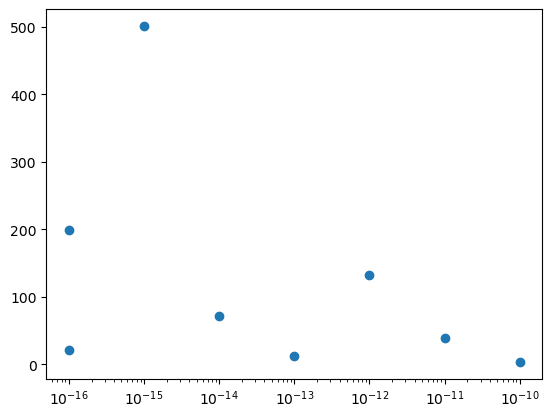

In [ ]:

dens_13 = 1e-13 #extra density for testing
dens_11 = 1e-11 #extra density for testing
dens_14 = 1e-14 #extra density for testing
dens_10 = 1e-10 #extra density for testing
dens_list = [dens_high,dens_high, dens_mid, dens_low, dens_13, dens_11, dens_14, dens_10]

#B_sf VARIABLE

B_sf_low = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_low/1e-16)
B_sf_mid = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_mid/1e-16)
B_sf_high = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_high/1e-16)
B_sf_13 = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_13/1e-16)
B_sf_11 = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_11/1e-16)
B_sf_14 = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_14/1e-16)
B_sf_10 = 6e2*((a_gamma_sf/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_10/1e-16)

#TESTING CONSTANTS
#dense list changed above
gamma_max_13 = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_13/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_max_11 = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_11/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_max_14 = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_14/1e-16)**(-0.25)) #used in eq 26 from eq 17
gamma_max_10 = 1e6 * xi**(-0.5) * (b_sf/0.5)*((a_gamma_sf/1.5)**(-0.25))*((e_b/0.1)**(-0.25))*((dens_10/1e-16)**(-0.25)) #used in eq 26 from eq 17



def gamma_a_big(): #when gamma_a > gamma_m
    q = 2.5 #need to set it to 2 when gamma_a > gamma_m
    gamma_2_low = gamma_max_low #set to gamma_m when gamma_a > gamma_m
    gamma_2_mid = gamma_max_mid 
    gamma_2_high = gamma_max_high 
    gamma_1 = gamma_m #set to gamma_max when gamma_a > gamma_m
    e = const.e.value
    pa = np.sin(np.pi/2) #set to 90 degrees for the pitch angle
    rho_sf = 1 #placeholder for now need to hear from Hiromichi
    #TESTING
    gamma_2_11 = gamma_max_11
    gamma_2_13 = gamma_max_13
    gamma_2_14 = gamma_max_14
    gamma_2_10 = gamma_max_10
    #mid plane 1e-9 density
    tc_gm = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_m/40)**-1) #eq 20, the last term needs to be changed to gamma_a for big one
    delta_shell_m = tc_gm * v_fs #need to make this to delta shell gamma_a for the next calculation
    tq_gm = (np.pi/3*np.sqrt(3)) * (((q**2 + q -2)*(gamma_1**-5))/1-((gamma_2_high/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_m)/(B_sf_high*pa*const.m_p.cgs.value)) #eq 22 need to change delta shell to delta shell gamma a
    cq_1 = ((2**(((q+1)+1)/2))/((q+1)+1)) * math.gamma(((q+1)/4)-(1/12)) * math.gamma(((q+1)/4)+(19/12)) #eq 23 for Cq+1
    gamma_a_m = gamma_m * ((tq_gm * cq_1)**(1/(q+4))) #eq 21 to start not sure how to make it
    #mid plane gamma_a 1e-9 density
    tc_ga0 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a_m/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a = tc_ga0 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga0 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_high/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a)/(B_sf_high*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a0 = gamma_m * ((tq_ga0 * cq_1)**(1/(q+4)))

    #Test 1e-10
    tc_ga10 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_10/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a0/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a10 = tc_ga10 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga10 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_10/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a10)/(B_sf_10*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a10 = gamma_m * ((tq_ga10 * cq_1)**(1/(q+4)))


    #TEST FOR 1e-11 
    tc_ga11 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_11/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a10/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a11 = tc_ga11 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga11 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_11/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a11)/(B_sf_11*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a11 = gamma_m * ((tq_ga11 * cq_1)**(1/(q+4)))


    #higher up 1e-12 density
    tc_ga = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_mid/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a11/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a = tc_ga * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_mid/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a)/(B_sf_mid*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a1 = gamma_m * ((tq_ga * cq_1)**(1/(q+4)))

    # 1e-13 test
    tc_ga13 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_13/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a1/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a13 = tc_ga13 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga13 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_13/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a13)/(B_sf_13*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a13 = gamma_m * ((tq_ga13 * cq_1)**(1/(q+4)))

    # 1e-14 test
    tc_ga14 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_14/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a13/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a14 = tc_ga14 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga14 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_14/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a14)/(B_sf_14*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a14 = gamma_m * ((tq_ga14 * cq_1)**(1/(q+4)))


    #top of the disk 1e-15 density
    tc_ga1 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_low/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a14/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
    delta_shell_a1 = tc_ga1 * v_fs #reuse this for gamma_a need to make it into a loop
    tq_ga1 = (np.pi/3*np.sqrt(3)) * ((q**2 + q -2)*(gamma_1**-5)/1-((gamma_2_low/gamma_1)**(-q+1))) * ((e*rho_sf*delta_shell_a1)/(B_sf_low*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
    gamma_a2 = gamma_m * ((tq_ga1 * cq_1)**(1/(q+4)))




    return gamma_a0, gamma_a1, gamma_a2, gamma_a_m, gamma_a11, gamma_a13, gamma_a14, gamma_a10

plt.scatter(dens_list, gamma_a_big())
plt.xscale('log')

In [34]:
#testing
e_b = 0.1
gamma_sf = 1.2
dens_high = 1e-16
gamma_a_m = 60
q= 2.5 
gamma_1 = 40 #gamma_m
gamma_2_high = 1e6 #gamma_max
e = const.e.value
pa = np.sin(np.pi/2) #set to 90 degrees for the pitch angle
rho_sf = 1 #placeholder for now need to hear from Hiromichi
v_fs = 0.5 * const.c.cgs.value #beta_fs is given as 0.5 so v_fs = 0.5c

B_sf_high = 600 * ((1.5/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_high/1e-16)

cq_1 = ((2**(((q+1)+1)/2))/((q+1)+1)) * math.gamma(((q+1)/4)-(1/12)) * math.gamma(((q+1)/4)+(19/12)) #eq 23 for Cq+1
tc_ga0 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a_m/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
delta_shell_a = tc_ga0 * v_fs #reuse this for gamma_a need to make it into a loop
tq_ga0 = (np.pi/(3*np.sqrt(3))) * (((q**2 + q -2)*(gamma_1**-5))/(1-((gamma_2_high/gamma_1)**(-q+1)))) * ((e*rho_sf*delta_shell_a)/(B_sf_high*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
gamma_a0 = gamma_1 * (((tq_ga0 * cq_1)**(1/(q+4))))

x=((e*rho_sf*delta_shell_a)/(B_sf_high*pa*const.m_p.cgs.value))
x1 = (((q**2 + q -2)*(gamma_1**-5))/(1-((gamma_2_high/gamma_1)**(-q+1))))
print(B_sf_high, cq_1, tc_ga0, delta_shell_a, tq_ga0, gamma_a0)

print(x, x1)

600.0 1.602393838648818 28.84615384615385 432392968269.23083 2751134.972978633 420.97576372994206
69030335014236.55 6.591798542607782e-08


In [ ]:
#testing with q = 2
e_b = 0.1
gamma_sf = 1.2
dens_high = 1e-16
gamma_a_m = 60
q= 2
gamma_2_high = 40 #gamma_m
gamma_1 = 1e6 #gamma_max
e = const.e.value
pa = np.sin(np.pi/2) #set to 90 degrees for the pitch angle
rho_sf = 1 #placeholder for now need to hear from Hiromichi

B_sf_high = 600 * ((1.5/1.5)**0.5) * ((e_b/0.1)**0.5) * (dens_high/1e-16)

cq_1 = ((2**(((q+1)+1)/2))/((q+1)+1)) * math.gamma(((q+1)/4)-(1/12)) * math.gamma(((q+1)/4)+(19/12)) #eq 23 for Cq+1
tc_ga0 = 3*10 * ((e_b/0.1)**-1)* ((((gamma_sf-1)*(4*gamma_sf+3))/1.5)**-1) * ((dens_high/1e-16)**-1) * ((gamma_sf/1.2)**-1) * ((gamma_a_m/60)**-1) #eq 20 edited to use gamma_a instead of gamma_m
delta_shell_a = tc_ga0 * v_fs #reuse this for gamma_a need to make it into a loop
tq_ga0 = (np.pi/(3*np.sqrt(3))) * (((q**2 + q -2)*(gamma_1**-5))/(1-((gamma_2_high/gamma_1)**(-q+1)))) * ((e*rho_sf*delta_shell_a)/(B_sf_high*pa*const.m_p.cgs.value)) #eq 22 need to make into loop
gamma_a0 = gamma_1 * (((tq_ga0 * cq_1)**(1/(q+4))))

print(cq_1, tc_ga0, delta_shell_a, tq_ga0, gamma_a0)

1.6122661015415265 28.84615384615385 432392968269.23083 -6.6779832666211886e-21 nan


/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23062/415229088.py:19: RuntimeWarning: invalid value encountered in scalar power
  gamma_a0 = gamma_1 * (((tq_ga0 * cq_1)**(1/(q+4))))
